In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
 data2024 = pd.read_csv(r"/content/drive/MyDrive/survey_results_public.csv")
 data2024.head(5)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [4]:
#data2024 = pd.read_csv(r"/content/survey_results_public.csv")
#data2024.head(5)

In [5]:
data2024.shape

(65437, 114)

In [6]:
# Check dimensions
print("Number of rows:", data2024.shape[0])
print("Number of columns:", data2024.shape[1])

# Check column names and data types
print(data2024.dtypes)

Number of rows: 65437
Number of columns: 114
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object


In [7]:
print(data2024.columns.tolist())

['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',

In [8]:
# Defining the list of columns to drop
drop_cols = ['ResponseId', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Currency', 'CompTotal',
    'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
    'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use', 'OpSysProfessional use',
    'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackAsyncAdmired',
    'OfficeStackSyncWantToWorkWith', 'AISearchDevAdmired', 'AISearchDevHaveWorkedWith', 'OfficeStackSyncAdmired',
    'AISearchDevWantToWorkWith', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'SOHow', 'AISelect',
    'AISent', 'AIAcc', 'AIBen', 'AIToolInterested in Using', 'AIToolCurrently Using', 'AIToolNot interested in Using',
    'AINextMuch more integrated','AIComplex', 'AINextNo change', 'AINextMore integrated', 'AINextLess integrated', 'AINextMuch less integrated',
    'AIThreat', 'AIEthics', 'AIChallenges',
    'TBranch', 'ICorPM', 'WorkExp', 'Knowledge_1', 'Knowledge_2', 'Knowledge_3',
    'Knowledge_4', 'Knowledge_5', 'Knowledge_6', 'Knowledge_7', 'Knowledge_8', 'Knowledge_9', 'Frequency_1', 'Frequency_2',
    'Frequency_3', 'TimeSearching', 'TimeAnswering','SurveyLength', 'SurveyEase', 'JobSatPoints_1', 'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7',
    'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_11']

# Drop the specified columns
data2024.drop(drop_cols, axis=1, inplace=True)

In [9]:
data2024.shape #checking rows and col after dropping the table

(65437, 41)

In [10]:
# Define the list of column names
cols = [
    'Age',
    'MainBranch',
    'Employment',
    'RemoteWork',
    'CodingActivities',
    'EdLevel',
    'LearnCode',
    'LearnCodeOnline',
    'TechDoc',
    'YearsCode',
    'YearsCodePro',
    'DevType',
    'TechEndorse',
    'Country',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'DatabaseHaveWorkedWith',
    'DatabaseWantToWorkWith',
    'PlatformHaveWorkedWith',
    'PlatformWantToWorkWith',
    'WebframeHaveWorkedWith',
    'WebframeWantToWorkWith',
    'ProfessionalTech',
    'Industry',
    'ConvertedCompYearly'
]

# Select the specified columns from df2018
df = data2024[cols]

In [11]:
#changing the name of columns for easier understanding
# 'MainBranch': 'Profession'
# 'ConvertedCompYearly': 'SalaryUSD'
data2024.rename(columns={'MainBranch': 'Profession', 'ConvertedCompYearly': 'SalaryUSD'},
                      inplace =True)

In [12]:
data2024.sort_index(axis=1).head(2)

,Age,BuildvsBuy,Check,CodingActivities,Country,DatabaseAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DevType,EdLevel,...,RemoteWork,SalaryUSD,TechDoc,TechEndorse,ToolsTechAdmired,WebframeAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,YearsCode,YearsCodePro
0,Under 18 years old,NaN,Apples,Hobby,United States of America,NaN,NaN,NaN,NaN,Primary/elementary school,...,Remote,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,35-44 years old,NaN,Apples,Hobby;Contribute to open-source projects;Other...,United Kingdom of Great Britain and Northern I...,PostgreSQL,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",...,Remote,NaN,API document(s) and/or SDK document(s);User gu...,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Express;Node.js;React,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,20,17


In [13]:
data2024.shape

(65437, 41)

In [14]:
print(data2024.isnull().sum()) #Finding Null Values

Profession                    0
Age                           0
Employment                    0
RemoteWork                10631
Check                         0
CodingActivities          10971
EdLevel                    4653
LearnCode                  4949
LearnCodeOnline           16200
TechDoc                   24540
YearsCode                  5568
YearsCodePro              13827
DevType                    5992
BuildvsBuy                22079
TechEndorse               21769
Country                    6507
LanguageHaveWorkedWith     5692
LanguageWantToWorkWith     9685
LanguageAdmired           14565
DatabaseHaveWorkedWith    15183
DatabaseWantToWorkWith    22879
DatabaseAdmired           26880
PlatformHaveWorkedWith    23071
PlatformWantToWorkWith    30905
PlatformAdmired           34060
WebframeHaveWorkedWith    20276
WebframeWantToWorkWith    26902
WebframeAdmired           30494
EmbeddedHaveWorkedWith    43223
EmbeddedWantToWorkWith    47837
EmbeddedAdmired           48704
MiscTech

##Data Validation - Total Cells vs Missing %

In [15]:
# Calculate the total number of missing values and their percentage in the dataset
missing_count = data2024.isnull().sum() # Count of missing values per column.
total_cells = np.product(data2024.shape) # Total number of cells in the dataset.
total_missing = missing_count.sum()  # Percentage of missing data.
missing_percent = (total_missing*100)/total_cells

# Print summary of missing data.
print('Total : ', total_cells)
print('Total missing : ', total_missing)
print('Missing Percentage: ', missing_percent, '%')

Total :  2682917
Total missing :  883376
Missing Percentage:  32.925953355992746 %


##Missing Percentage ColumnWise

In [16]:
def missing(df,column,n):
    empty_cells=df[column].isnull().sum()
    return (empty_cells*100.0)/n

In [17]:
total_cells=data2024.shape[0]
for column in data2024.columns:
    res=missing(data2024,column,total_cells)
    print(column,":","{:.2f}".format(res),"%")

Profession : 0.00 %
Age : 0.00 %
Employment : 0.00 %
RemoteWork : 16.25 %
Check : 0.00 %
CodingActivities : 16.77 %
EdLevel : 7.11 %
LearnCode : 7.56 %
LearnCodeOnline : 24.76 %
TechDoc : 37.50 %
YearsCode : 8.51 %
YearsCodePro : 21.13 %
DevType : 9.16 %
BuildvsBuy : 33.74 %
TechEndorse : 33.27 %
Country : 9.94 %
LanguageHaveWorkedWith : 8.70 %
LanguageWantToWorkWith : 14.80 %
LanguageAdmired : 22.26 %
DatabaseHaveWorkedWith : 23.20 %
DatabaseWantToWorkWith : 34.96 %
DatabaseAdmired : 41.08 %
PlatformHaveWorkedWith : 35.26 %
PlatformWantToWorkWith : 47.23 %
PlatformAdmired : 52.05 %
WebframeHaveWorkedWith : 30.99 %
WebframeWantToWorkWith : 41.11 %
WebframeAdmired : 46.60 %
EmbeddedHaveWorkedWith : 66.05 %
EmbeddedWantToWorkWith : 73.10 %
EmbeddedAdmired : 74.43 %
MiscTechAdmired : 54.77 %
ToolsTechAdmired : 32.76 %
NEWCollabToolsAdmired : 22.50 %
Frustration : 56.83 %
ProfessionalTech : 57.57 %
ProfessionalCloud : 56.46 %
ProfessionalQuestion : 55.98 %
Industry : 55.90 %
SalaryUSD : 64

#Neha Gaikwad

##Field 1: AGE

In [18]:
data2024['Age'].value_counts().nlargest(10)

,count
Age,
25-34 years old,23911
35-44 years old,14942
18-24 years old,14098
45-54 years old,6249
55-64 years old,2575
Under 18 years old,2568
65 years or older,772
Prefer not to say,322


In [19]:
data2024['Age'].isnull().sum()

0

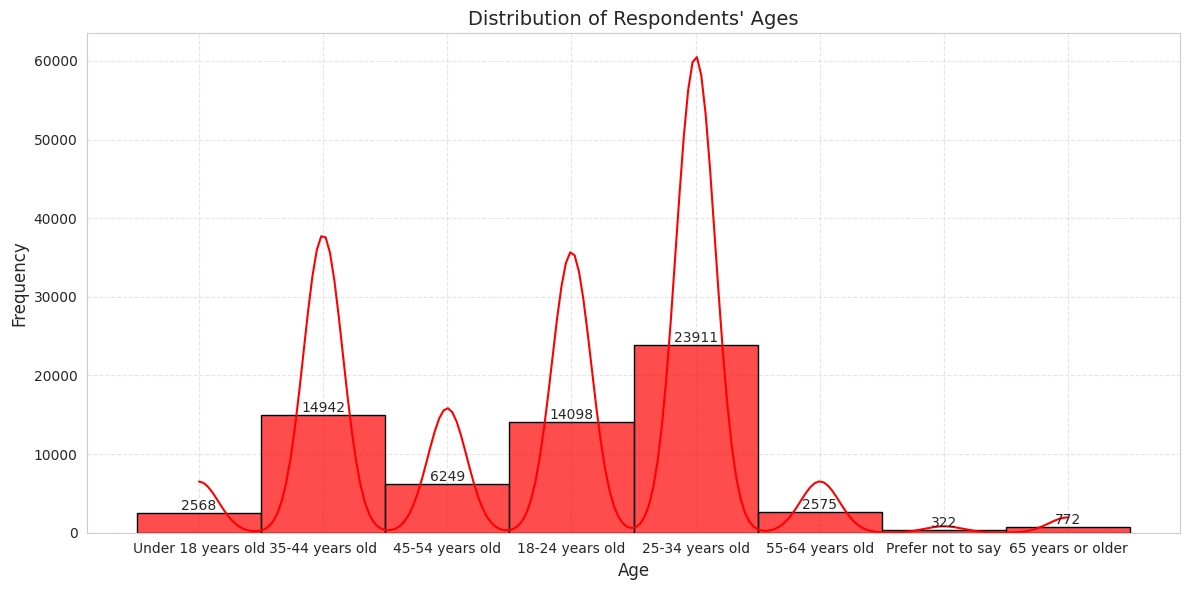

In [20]:
# Set the style
sns.set_style('whitegrid')

# Plotting the histogram
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=data2024, x='Age', bins=30, kde=True, color='red', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.xlabel('Age', fontsize=12)  # Label for x-axis
plt.ylabel('Frequency', fontsize=12)  # Label for y-axis
plt.title('Distribution of Respondents\' Ages', fontsize=14)  # Title of the plot

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Annotate each bar with its frequency
for rect in ax.patches:
    # Get the height of the bar
    height = rect.get_height()
    # Add text annotation
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()

##Field 2: Education Level

In [21]:
data2024['EdLevel'].isnull().sum()

4653

In [22]:
import plotly.express as px

# Get the value counts for 'EdLevel'
edlevel_counts = data2024['EdLevel'].value_counts()

# Convert to a DataFrame for better compatibility with Plotly
edlevel_counts_df = edlevel_counts.reset_index()
edlevel_counts_df.columns = ['EdLevel', 'Count']

# Create the Plotly bar chart
fig = px.bar(
    edlevel_counts_df,
    x='Count',
    y='EdLevel',
    orientation='h',
    color='Count',
    title='Education Level Distribution',
    labels={'EdLevel': 'Education Level', 'Count': 'Count'},
    color_continuous_scale='Blues'
)

# Update layout for better appearance
fig.update_layout(
    xaxis_title="Count",
    yaxis_title="Education Level",
    title_font_size=20,
    xaxis=dict(title_font_size=14),
    yaxis=dict(title_font_size=14),
    height=600
)

# Show the interactive plot
fig.show()


In [23]:
#Refactoring EdLevel
def refactor_ed(df):
    '''function to change Education level category to Bachelors, Masters, Professional, Associate, Doctorate, No Degree'''
    conditions_ed = [(df['EdLevel'] == 'Associate degree (A.A., A.S., etc.)'),
                    (df['EdLevel'] == 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'),
                    (df['EdLevel'] == 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'),
                    (df['EdLevel'] == 'Professional degree (JD, MD, etc.)'),
                    (df['EdLevel'] == 'Other doctoral degree (Ph.D., Ed.D., etc.)'),
                    (df['EdLevel'] == 'Some college/university study without earning a degree')
                    | (df['EdLevel'] == 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)')
                    | (df['EdLevel'] == 'Primary/elementary school')
                    | (df['EdLevel'] == 'I never completed any formal education')]

    choices_ed = ['Associate', 'Bachelors', 'Masters', 'Professional',  'Doctorate', 'No Degree']
    df['EdLevel'] = np.select(conditions_ed, choices_ed, default = np.NaN)
    return df

# applying function to subsets
data2024 = refactor_ed(data2024)
#Assigining the surveyors who havent mentioned their education level to Bachelor’s degree
data2024['EdLevel'].replace('nan', 'Bachelors', inplace=True)

<ipython-input-23-0f88c988545d>:21: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [24]:
data2024['EdLevel'].value_counts()

,count
EdLevel,
Bachelors,33497
Masters,15557
No Degree,14590
Associate,1793


##Developer domains

In [25]:
data2024['DevType'].isnull().sum()

5992

<ipython-input-26-174df07164d0>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




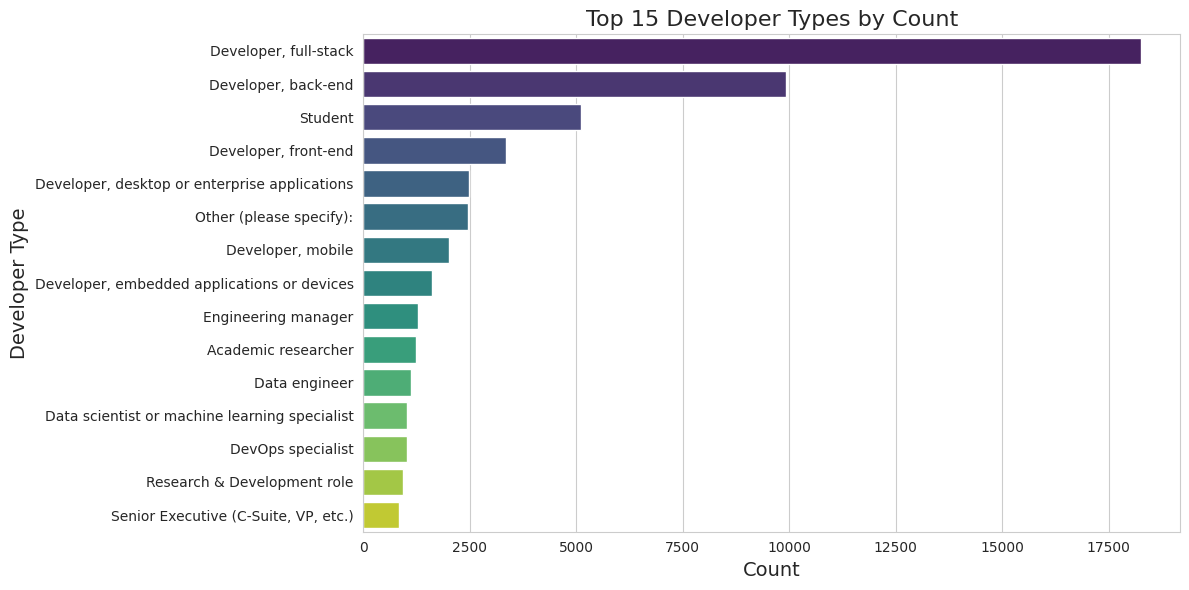

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 15 DevType counts
top_15_devtypes = data2024['DevType'].value_counts().nlargest(15)

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_15_devtypes.values, y=top_15_devtypes.index, palette='viridis')

# Add titles and labels
plt.title('Top 15 Developer Types by Count', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Developer Type', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

In [27]:
data2024['DevType'] = data2024['DevType'].bfill().ffill()

##Education Level vs Country

In [28]:
import geopandas as gpd
import pandas as pd
import geopandas as gpd
import folium
from folium import Choropleth

# 1. Preprocess Data
# Limiting data to top 20 countries by count (or any other criterion)
top_countries = data2024['Country'].value_counts().head(20).index
filtered_data = data2024[data2024['Country'].isin(top_countries)]

# Map Education Level to numeric values for aggregation
ed_level_mapping = {
    "No Degree": 0,
    "Associate": 1,
    "Bachelors": 2,
    "Masters": 3,
    "Professional": 4,
    "Doctorate": 5
}

# Ensure that we create a copy to avoid modifying a slice directly
filtered_data = filtered_data.copy()
filtered_data['EdLevelNum'] = filtered_data['EdLevel'].map(ed_level_mapping)

# 2. Compute the most frequent education level (mode) by country
# Use the mode function to find the most common education level per country
mode_edlevel_by_country = filtered_data.groupby('Country')['EdLevelNum'].apply(lambda x: x.mode()[0]).reset_index()

# 3. Load GeoJSON file for country boundaries
geojson_url = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'
geo_data = gpd.read_file(geojson_url)

# Merge the data for choropleth (most frequent education level with country map)
geo_data = geo_data.merge(mode_edlevel_by_country, left_on='name', right_on='Country', how='left')

# 4. Create the Folium map
m = folium.Map(location=[20, 0], zoom_start=2, tiles="CartoDB positron")

# 5. Create the Choropleth Map
choropleth = Choropleth(
    geo_data=geo_data,
    name='choropleth',
    data=geo_data,
    columns=['name', 'EdLevelNum'],
    key_on='feature.properties.name',  # Ensure that country names match
    fill_color='YlGnBu',  # Choose a color scale (you can change this)
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Most Frequent Education Level',
).add_to(m)

# 6. Add popups for more info (optional)
for _, row in geo_data.iterrows():
    # Handle NaN values gracefully
    if pd.isna(row['EdLevelNum']):
        ed_level_word = "Data Missing"
    else:
        # Get the corresponding education level from the mapping
        ed_level_word = {v: k for k, v in ed_level_mapping.items()}.get(row['EdLevelNum'], "Unknown Level")

    folium.Popup(f"{row['name']}: Most Frequent Education Level = {ed_level_word}").add_to(m)

# 7. Display the map inline
display(m)  # Use this in Jupyter notebooks or Colab to display the map inline


##Profession

In [29]:
data2024['Profession'].isnull().sum()

0

In [30]:
data2024.groupby('Profession')['Profession'].count()

,Profession
Profession,
I am a developer by profession,50207
I am learning to code,3875
"I am not primarily a developer, but I write code sometimes as part of my work/studies",6511
I code primarily as a hobby,3334
"I used to be a developer by profession, but no longer am",1510


In [31]:
data2024.dropna(subset=['Profession'], inplace = True)

In [32]:
#Lets refactor column values of Profession column
#refactoring profession column

def refactor_prof(df):
    '''function to change Profession category to Developer, Student, Non-Developer, Novoice, Ex-Developer'''
    conditions_prof = [(df['Profession'] == 'I am a developer by profession'),
                       (df['Profession'] == 'I am learning to code'),
                       (df['Profession'] == 'I am not primarily a developer, but I write code sometimes as part of my work/studies'),
                       (df['Profession'] == 'I code primarily as a hobby'),
                       (df['Profession'] == 'I used to be a developer by profession, but no longer am')]

    choices_prof = ['Developer', 'Student', 'Non developer', 'Novoice', 'Ex-Developer']
    df['Profession'] = np.select(conditions_prof, choices_prof, default=np.nan)
    return df

data2024 = refactor_prof(data2024)

In [33]:
data2024['Profession'].value_counts()

,count
Profession,
Developer,50207
Non developer,6511
Student,3875
Novoice,3334
Ex-Developer,1510


In [34]:
data2024['Profession'].isnull().sum()

0

##Cleaning Data for eda

In [35]:
data2024['DevType'] = data2024['DevType'].bfill().ffill()

data2024['LanguageWantToWorkWith']=data2024['LanguageWantToWorkWith'].bfill().ffill()


data2024['LanguageHaveWorkedWith']=data2024['LanguageHaveWorkedWith'].bfill().ffill()

data2024['LanguageAdmired']=data2024['LanguageAdmired'].bfill().ffill()

data2024['Employment']=data2024['Employment'].bfill().ffill()


data2024['RemoteWork']=data2024['RemoteWork'].bfill().ffill()

data2024['CodingActivities']=data2024['CodingActivities'].bfill().ffill()

data2024['LearnCodeOnline']=data2024['LearnCodeOnline'].bfill().ffill()

data2024['LearnCode']=data2024['LearnCode'].bfill().ffill()

data2024['TechDoc']=data2024['TechDoc'].bfill().ffill()

data2024['YearsCode']=data2024['YearsCode'].bfill().ffill()

data2024['TechEndorse']=data2024['TechEndorse'].bfill().ffill()

data2024['DatabaseHaveWorkedWith']=data2024['DatabaseHaveWorkedWith'].bfill().ffill()

data2024['DatabaseWantToWorkWith']=data2024['DatabaseWantToWorkWith'].bfill().ffill()

data2024['DatabaseAdmired']=data2024['DatabaseAdmired'].bfill().ffill()

data2024['PlatformHaveWorkedWith']=data2024['PlatformHaveWorkedWith'].bfill().ffill()


data2024['PlatformWantToWorkWith']=data2024['PlatformWantToWorkWith'].bfill().ffill()

data2024['PlatformAdmired']=data2024['PlatformAdmired'].bfill().ffill()

data2024['WebframeHaveWorkedWith']=data2024['WebframeHaveWorkedWith'].bfill().ffill()

data2024['WebframeWantToWorkWith']=data2024['WebframeWantToWorkWith'].bfill().ffill()

data2024['WebframeAdmired']=data2024['WebframeAdmired'].bfill().ffill()

data2024['EmbeddedHaveWorkedWith']=data2024['EmbeddedHaveWorkedWith'].bfill().ffill()

data2024['EmbeddedWantToWorkWith']=data2024['EmbeddedWantToWorkWith'].bfill().ffill()

data2024['EmbeddedAdmired']=data2024['EmbeddedAdmired'].bfill().ffill()

data2024['MiscTechAdmired']=data2024['MiscTechAdmired'].bfill().ffill()

data2024['ToolsTechAdmired']=data2024['ToolsTechAdmired'].bfill().ffill()

data2024['NEWCollabToolsAdmired']=data2024['NEWCollabToolsAdmired'].bfill().ffill()

data2024['ProfessionalTech']=data2024['ProfessionalTech'].bfill().ffill()

data2024['ProfessionalCloud']=data2024['ProfessionalCloud'].bfill().ffill()

data2024['Industry']=data2024['Industry'].bfill().ffill()

data2024['BuildvsBuy']=data2024['BuildvsBuy'].bfill().ffill()



In [36]:
print(data2024.isnull().sum())

Profession                    0
Age                           0
Employment                    0
RemoteWork                    0
Check                         0
CodingActivities              0
EdLevel                       0
LearnCode                     0
LearnCodeOnline               0
TechDoc                       0
YearsCode                     0
YearsCodePro              13827
DevType                       0
BuildvsBuy                    0
TechEndorse                   0
Country                    6507
LanguageHaveWorkedWith        0
LanguageWantToWorkWith        0
LanguageAdmired               0
DatabaseHaveWorkedWith        0
DatabaseWantToWorkWith        0
DatabaseAdmired               0
PlatformHaveWorkedWith        0
PlatformWantToWorkWith        0
PlatformAdmired               0
WebframeHaveWorkedWith        0
WebframeWantToWorkWith        0
WebframeAdmired               0
EmbeddedHaveWorkedWith        0
EmbeddedWantToWorkWith        0
EmbeddedAdmired               0
MiscTech

In [37]:
#resetting the index values
df2020 = data2024.reset_index(drop=True)

In [38]:
data2024.head(5)

,Profession,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,...,MiscTechAdmired,ToolsTechAdmired,NEWCollabToolsAdmired,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,SalaryUSD,JobSat
0,Developer,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,No Degree,Books / Physical media,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,.NET (5+) ;.NET Framework (1.0 - 4.8);.NET MAUI,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,NaN,DevOps function;Automated testing;Observabilit...,Cloud only (single or multi-cloud),NaN,Healthcare,NaN,NaN
1,Developer,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,Bachelors,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,.NET (5+) ;.NET Framework (1.0 - 4.8);.NET MAUI,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,NaN,DevOps function;Automated testing;Observabilit...,Cloud only (single or multi-cloud),NaN,Healthcare,NaN,NaN
2,Developer,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,Masters,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,.NET (5+) ;.NET Framework (1.0 - 4.8);.NET MAUI,MSBuild,Visual Studio,NaN,DevOps function;Automated testing;Observabilit...,Cloud only (single or multi-cloud),NaN,Healthcare,NaN,NaN
3,Student,18-24 years old,"Student, full-time",Remote,Apples,I don’t code outside of work,No Degree,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,API document(s) and/or SDK document(s);User gu...,...,.NET (5+) ;.NET Framework (1.0 - 4.8);RabbitMQ,Docker;npm,Vim,NaN,DevOps function;Automated testing;Observabilit...,Cloud only (single or multi-cloud),NaN,Healthcare,NaN,NaN
4,Developer,18-24 years old,"Student, full-time",Remote,Apples,I don’t code outside of work,No Degree,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,...,.NET (5+) ;.NET Framework (1.0 - 4.8);RabbitMQ,APT;Make,Vim,NaN,DevOps function;Automated testing;Observabilit...,Cloud only (single or multi-cloud),NaN,Healthcare,NaN,NaN


In [39]:
data2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Profession              65437 non-null  object 
 1   Age                     65437 non-null  object 
 2   Employment              65437 non-null  object 
 3   RemoteWork              65437 non-null  object 
 4   Check                   65437 non-null  object 
 5   CodingActivities        65437 non-null  object 
 6   EdLevel                 65437 non-null  object 
 7   LearnCode               65437 non-null  object 
 8   LearnCodeOnline         65437 non-null  object 
 9   TechDoc                 65437 non-null  object 
 10  YearsCode               65437 non-null  object 
 11  YearsCodePro            51610 non-null  object 
 12  DevType                 65437 non-null  object 
 13  BuildvsBuy              65437 non-null  object 
 14  TechEndorse             65437 non-null

##After Cleaning

In [40]:
#Find % of missing data
missing_count = data2024.isnull().sum() #number of missing
total_cells = np.product(data2024.shape) # number of cells (cols x rows)
total_missing = missing_count.sum()
missing_percent = (total_missing*100)/total_cells

print('Total : ', total_cells)
print('Total missing : ', total_missing)
print('Missing Percentage: ', missing_percent, '%')

Total :  2682917
Total missing :  172463
Missing Percentage:  6.428189914186685 %


##DevType vs Salary

<ipython-input-41-1948a3858aa4>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




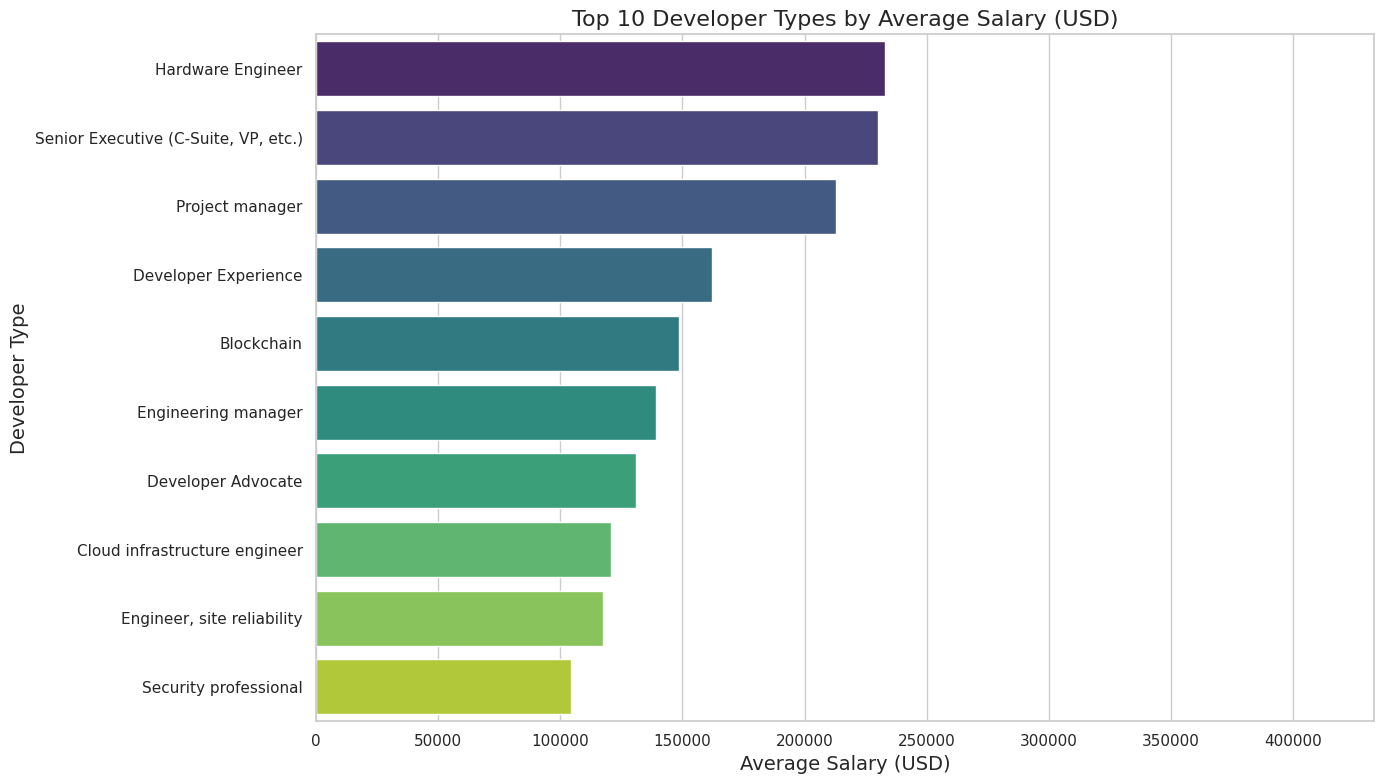

In [41]:
# Split the DevType column to handle multiple roles
devtype_salary_data = data2024[['DevType', 'SalaryUSD']].dropna()
devtype_salary_data = devtype_salary_data.assign(DevType=devtype_salary_data['DevType'].str.split(';')).explode('DevType')

# Group by DevType and calculate the mean salary
devtype_salary = devtype_salary_data.groupby('DevType', as_index=False)['SalaryUSD'].mean()

# Sort by Salary and select top 10 developer types
top_devtypes = devtype_salary.sort_values(by='SalaryUSD', ascending=False).head(10)

# Set Seaborn style
sns.set(style="whitegrid")

# Create the barplot
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x='SalaryUSD',
    y='DevType',
    data=top_devtypes,
    palette='viridis'
)

# Set titles and labels
ax.set_title('Top 10 Developer Types by Average Salary (USD)', fontsize=16)
ax.set_xlabel('Average Salary (USD)', fontsize=14)
ax.set_ylabel('Developer Type', fontsize=14)

# Calculate an appropriate x-axis limit
max_salary = top_devtypes['SalaryUSD'].max()
plt.xlim(0, max_salary + 200000)  # Extend x-axis by 5000 for annotations



# Adjust layout and show the plot
plt.tight_layout()
plt.show()



#Brianna

##Top Used Languages for Programming by developers

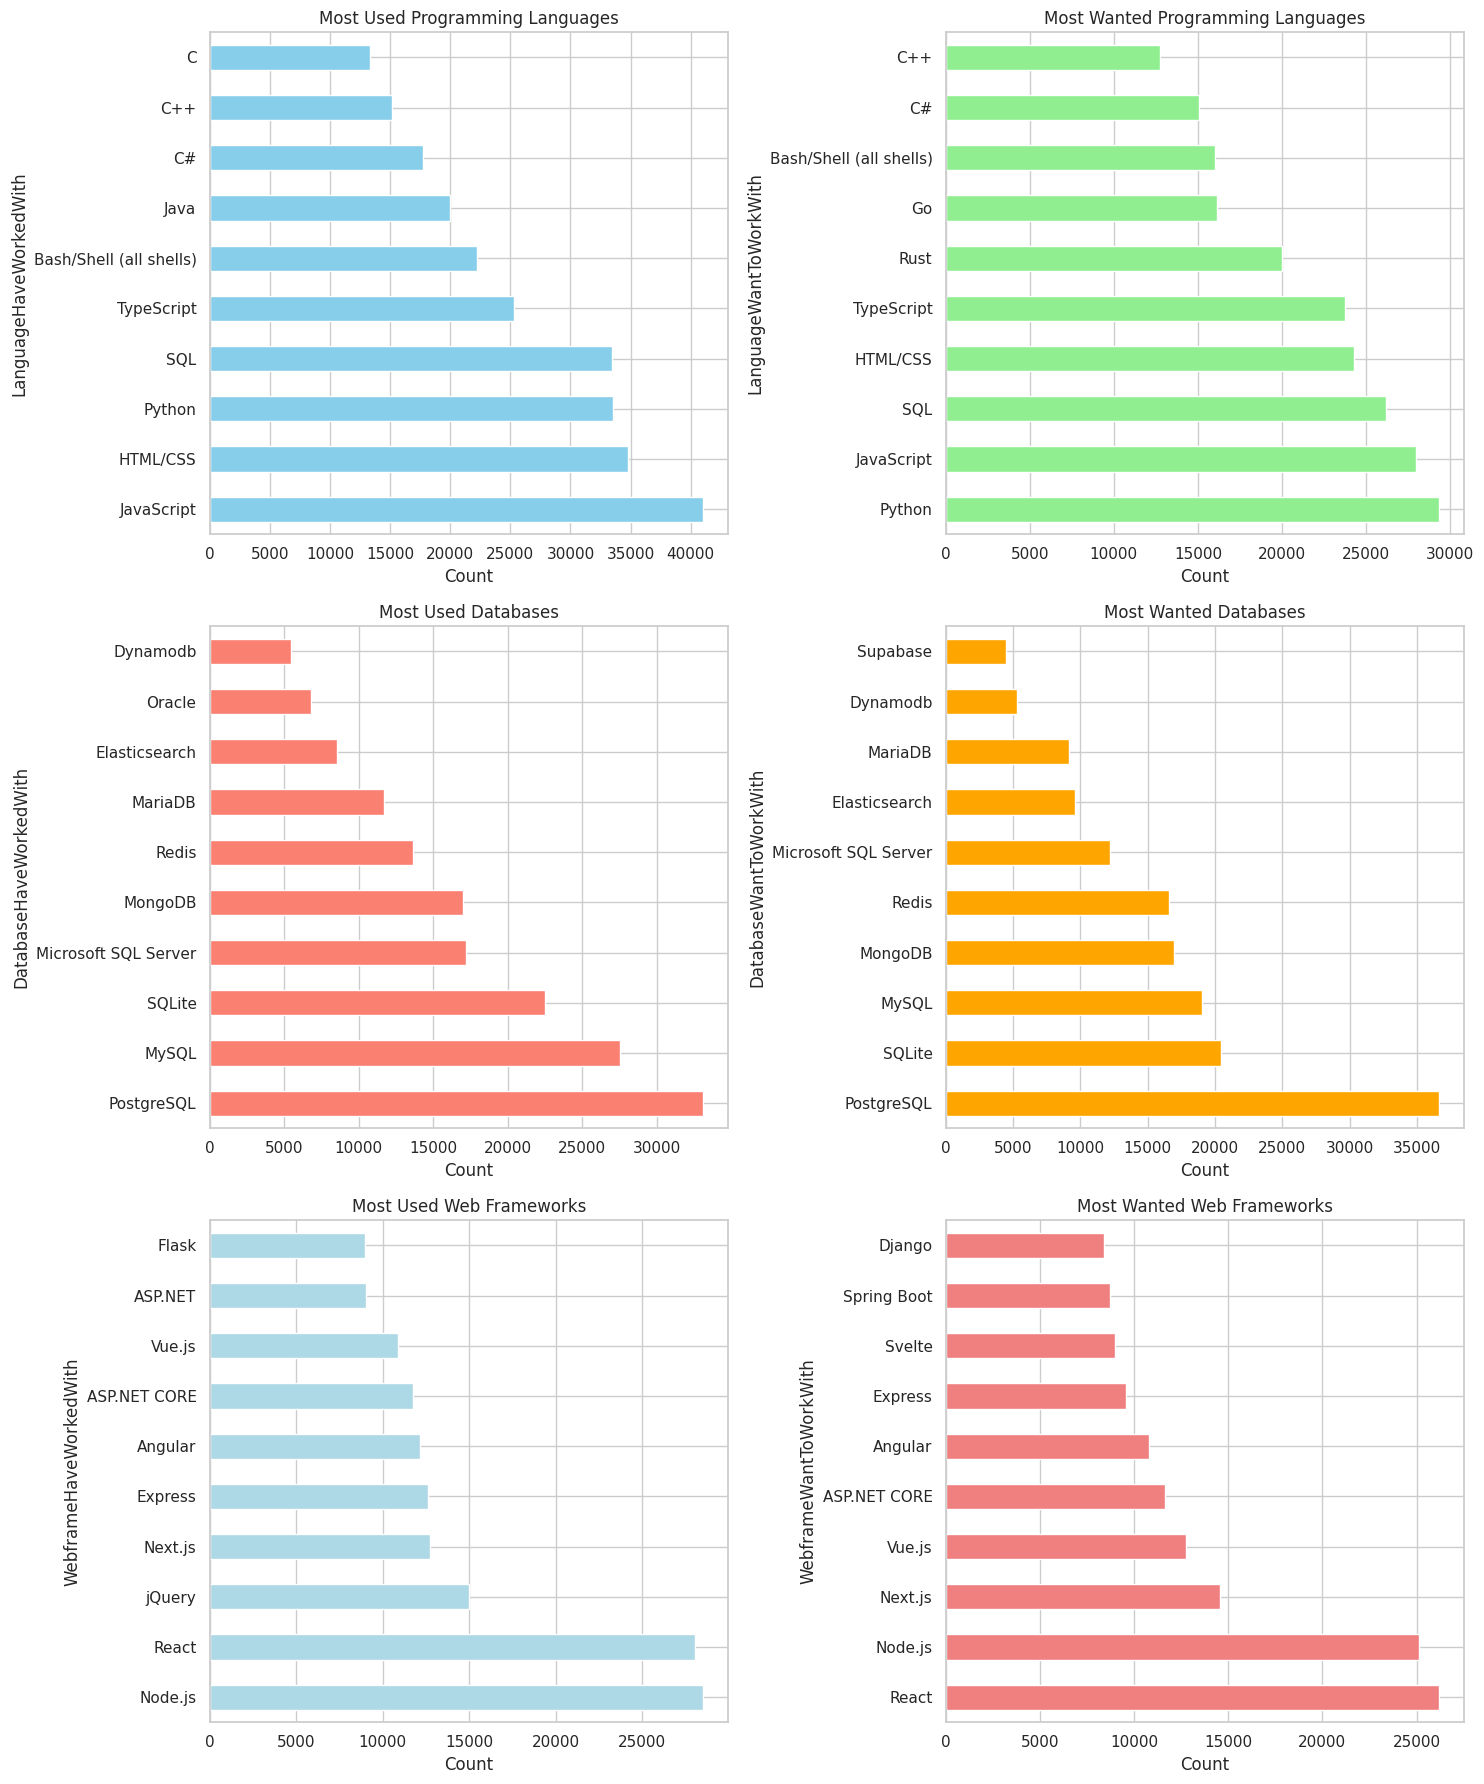

In [42]:
# Extracting language data
language_have_worked_with = data2024['LanguageHaveWorkedWith'].str.split(';').explode().str.strip()
language_want_to_work_with = data2024['LanguageWantToWorkWith'].str.split(';').explode().str.strip()

# Extracting database data
database_have_worked_with = data2024['DatabaseHaveWorkedWith'].str.split(';').explode().str.strip()
database_want_to_work_with = data2024['DatabaseWantToWorkWith'].str.split(';').explode().str.strip()

# Extracting web framework data
webframe_have_worked_with = data2024['WebframeHaveWorkedWith'].str.split(';').explode().str.strip()
webframe_want_to_work_with = data2024['WebframeWantToWorkWith'].str.split(';').explode().str.strip()

# Counting occurrences of each language, database, and web framework
language_have_worked_with_counts = language_have_worked_with.value_counts().sort_values(ascending=False)
language_want_to_work_with_counts = language_want_to_work_with.value_counts().sort_values(ascending=False)
database_have_worked_with_counts = database_have_worked_with.value_counts().sort_values(ascending=False)
database_want_to_work_with_counts = database_want_to_work_with.value_counts().sort_values(ascending=False)
webframe_have_worked_with_counts = webframe_have_worked_with.value_counts().sort_values(ascending=False)
webframe_want_to_work_with_counts = webframe_want_to_work_with.value_counts().sort_values(ascending=False)

# Plotting
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))

# Plot most used programming languages
language_have_worked_with_counts.head(10).plot(kind='barh', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Most Used Programming Languages')
axes[0, 0].set_xlabel('Count')

# Plot most wanted programming languages
language_want_to_work_with_counts.head(10).plot(kind='barh', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Most Wanted Programming Languages')
axes[0, 1].set_xlabel('Count')

# Plot most used databases
database_have_worked_with_counts.head(10).plot(kind='barh', ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Most Used Databases')
axes[1, 0].set_xlabel('Count')

# Plot most wanted databases
database_want_to_work_with_counts.head(10).plot(kind='barh', ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Most Wanted Databases')
axes[1, 1].set_xlabel('Count')

# Plot most used web frameworks
webframe_have_worked_with_counts.head(10).plot(kind='barh', ax=axes[2, 0], color='lightblue')
axes[2, 0].set_title('Most Used Web Frameworks')
axes[2, 0].set_xlabel('Count')

# Plot most wanted web frameworks
webframe_want_to_work_with_counts.head(10).plot(kind='barh', ax=axes[2, 1], color='lightcoral')
axes[2, 1].set_title('Most Wanted Web Frameworks')
axes[2, 1].set_xlabel('Count')

plt.tight_layout()
plt.show()


##Top Employment Types

<ipython-input-43-fca09612cd5d>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




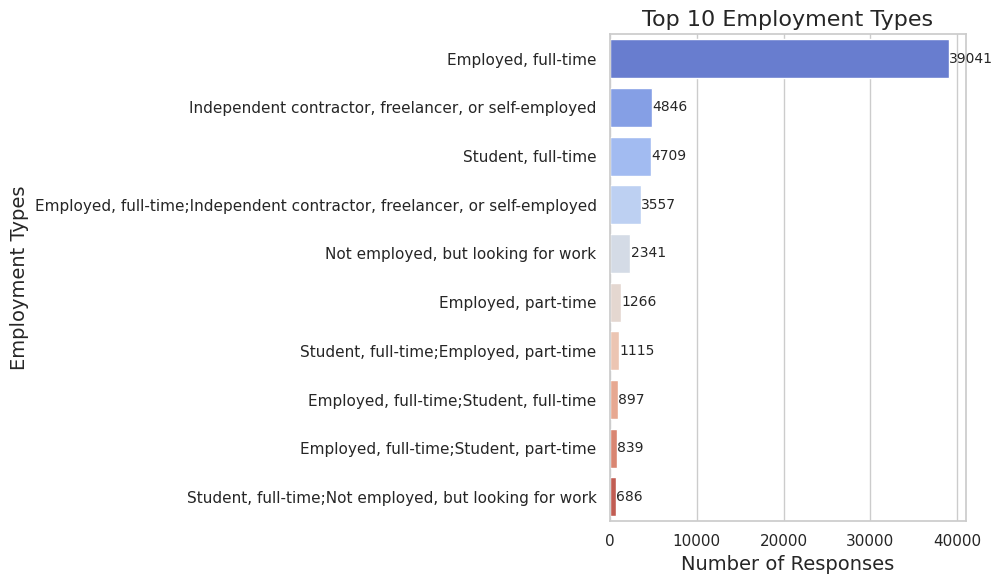

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 10 Employment types
employment_counts = data2024['Employment'].value_counts().head(10)

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the top 10 employment types
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=employment_counts.values,
    y=employment_counts.index,
    palette='coolwarm'
)

# Add titles and labels
ax.set_title('Top 10 Employment Types', fontsize=16)
ax.set_xlabel('Number of Responses', fontsize=14)
ax.set_ylabel('Employment Types', fontsize=14)

# Display the count on top of each bar
for index, value in enumerate(employment_counts.values):
    ax.text(value + 50, index, str(value), ha='left', va='center', fontsize=10)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Salary Vs Years of Experience

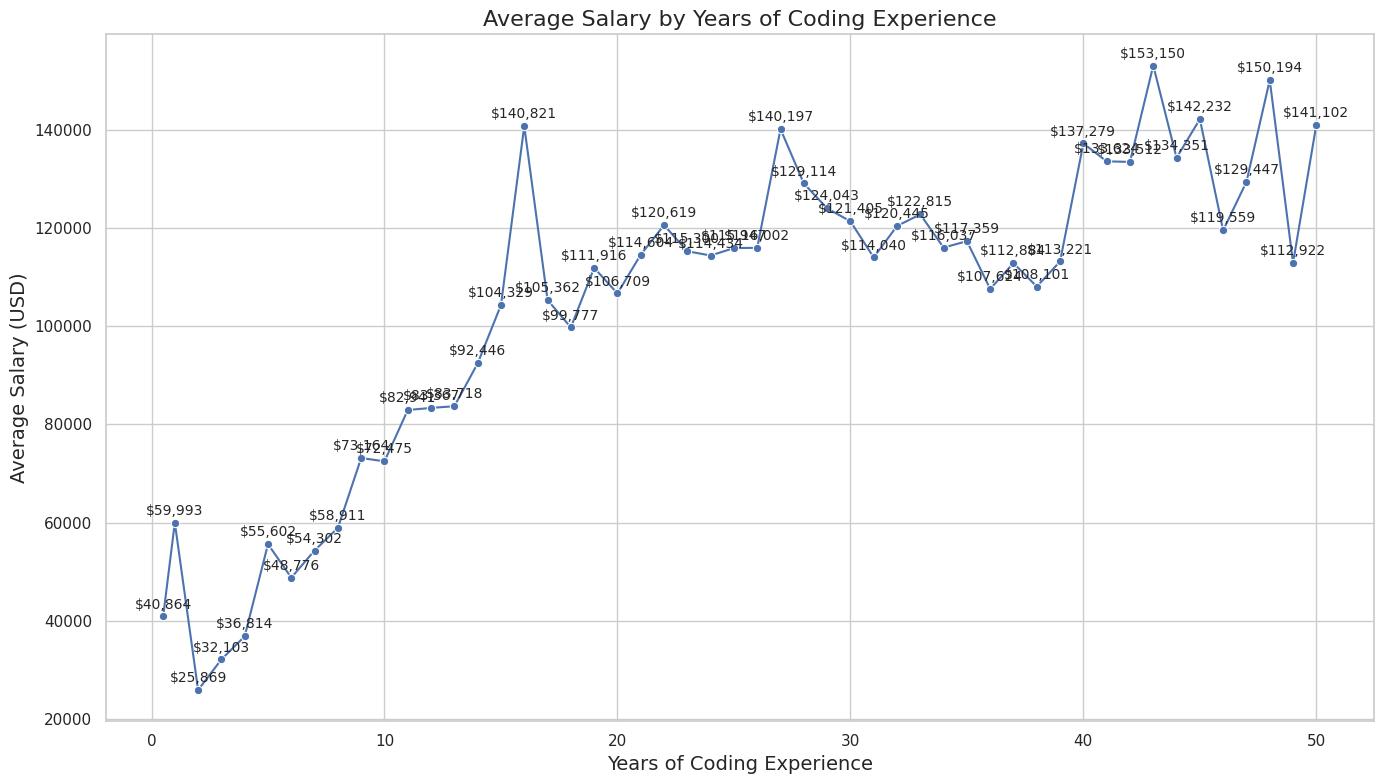

In [44]:
# Extract the relevant columns for experience and salary
experience_salary_data = data2024[['YearsCode', 'SalaryUSD']].dropna()

# Convert YearsCoding to a numerical representation
def experience_to_numeric(experience):
    if 'Less than 1 year' in experience:
        return 0.5
    elif 'More than 50 years' in experience:
        return 50
    else:
        # Extract the numerical range and take the midpoint
        range_values = [float(s) for s in experience.split(' ')[0::2]]
        return sum(range_values) / len(range_values)

experience_salary_data['YearsCodingNumeric'] = experience_salary_data['YearsCode'].apply(experience_to_numeric)

# Group by experience and calculate the mean salary
experience_salary = experience_salary_data.groupby('YearsCodingNumeric', as_index=False)['SalaryUSD'].mean()

# Sort by experience
experience_salary = experience_salary.sort_values(by='YearsCodingNumeric')

# Visualization
plt.figure(figsize=(14, 8))
ax = sns.lineplot(
    x='YearsCodingNumeric',
    y='SalaryUSD',
    data=experience_salary,
    marker='o'
)

# Set titles and labels
ax.set_title('Average Salary by Years of Coding Experience', fontsize=16)
ax.set_xlabel('Years of Coding Experience', fontsize=14)
ax.set_ylabel('Average Salary (USD)', fontsize=14)

# Add data labels for clarity
for index, row in experience_salary.iterrows():
    ax.text(row['YearsCodingNumeric'], row['SalaryUSD'] + 1000, f"${row['SalaryUSD']:,.0f}",
            ha='center', va='bottom', fontsize=10)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#Sahana

##Country

In [45]:
import geopandas as gpd

In [46]:
import pandas as pd
import plotly.express as px

# Assuming data2024 is already your dataset
# Filter rows where 'SalaryUSD' and 'Country' are not null
data_choro = data2024.dropna(subset=['SalaryUSD', 'Country'])

# Calculate the average salary by country
avg_salary_by_country = data_choro.groupby('Country')['SalaryUSD'].mean().reset_index()

# Bin the salary into categories like '100k', '90k', etc.
bins = [0, 50000, 70000, 90000, 110000, 130000, 150000, 200000, float('inf')]
labels = ['<50k', '50k-70k', '70k-90k', '90k-110k', '110k-130k', '130k-150k', '150k-200k', '200k+']
avg_salary_by_country['SalaryCategory'] = pd.cut(avg_salary_by_country['SalaryUSD'], bins=bins, labels=labels)

# Create the choropleth map of average salary across countries
fig = px.choropleth(avg_salary_by_country,
                    locations='Country',
                    locationmode='country names',
                    color='SalaryCategory',
                    hover_name='Country',
                    hover_data=['SalaryUSD'],
                    color_discrete_map={
                        '<50k': 'blue',
                        '50k-70k': 'green',
                        '70k-90k': 'yellow',
                        '90k-110k': 'orange',
                        '110k-130k': 'red',
                        '130k-150k': 'purple',
                        '150k-200k': 'pink',
                        '200k+': 'black'
                    },
                    title='Average Salary Across Countries (Binned)',
                    projection='natural earth')

# Show the map
fig.show(renderer="colab")


<ipython-input-47-94d16ae42205>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




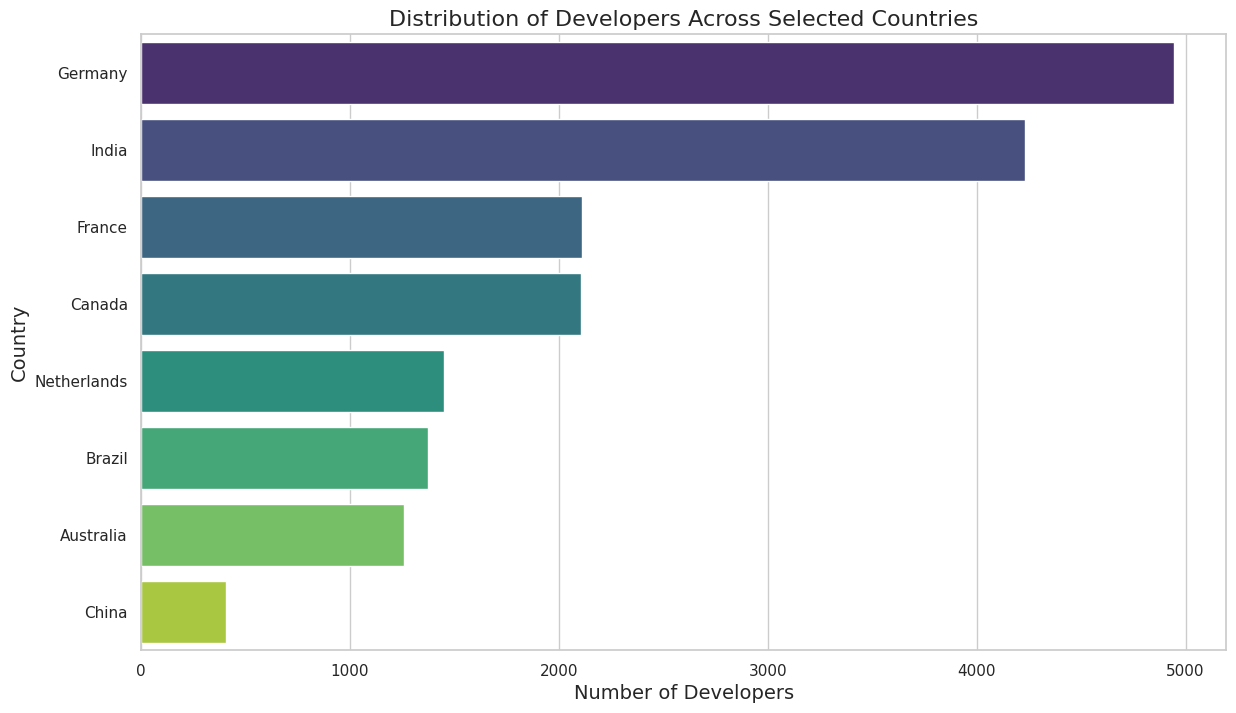

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data2024 is the dataset you mentioned
# First, clean the data by dropping rows where 'Country' is null
filtered_data = data2024.dropna(subset=['Country'])

# 1. Filter data for the specified countries
selected_countries = ['USA', 'India', 'Germany', 'UK', 'Canada', 'France', 'Brazil', 'Australia', 'Netherlands', 'Russia', 'China']
filtered_data = filtered_data[filtered_data['Country'].isin(selected_countries)]

# 2. Count the number of developers in each country
developer_count = filtered_data['Country'].value_counts().reset_index()
developer_count.columns = ['Country', 'DeveloperCount']

# 3. Visualize the distribution of developers across countries
plt.figure(figsize=(14, 8))
sns.barplot(x='DeveloperCount', y='Country', data=developer_count, palette='viridis')

# Add title and labels
plt.title('Distribution of Developers Across Selected Countries', fontsize=16)
plt.xlabel('Number of Developers', fontsize=14)
plt.ylabel('Country', fontsize=14)

# Show the plot
plt.show()


##Popular developer roles accross countries

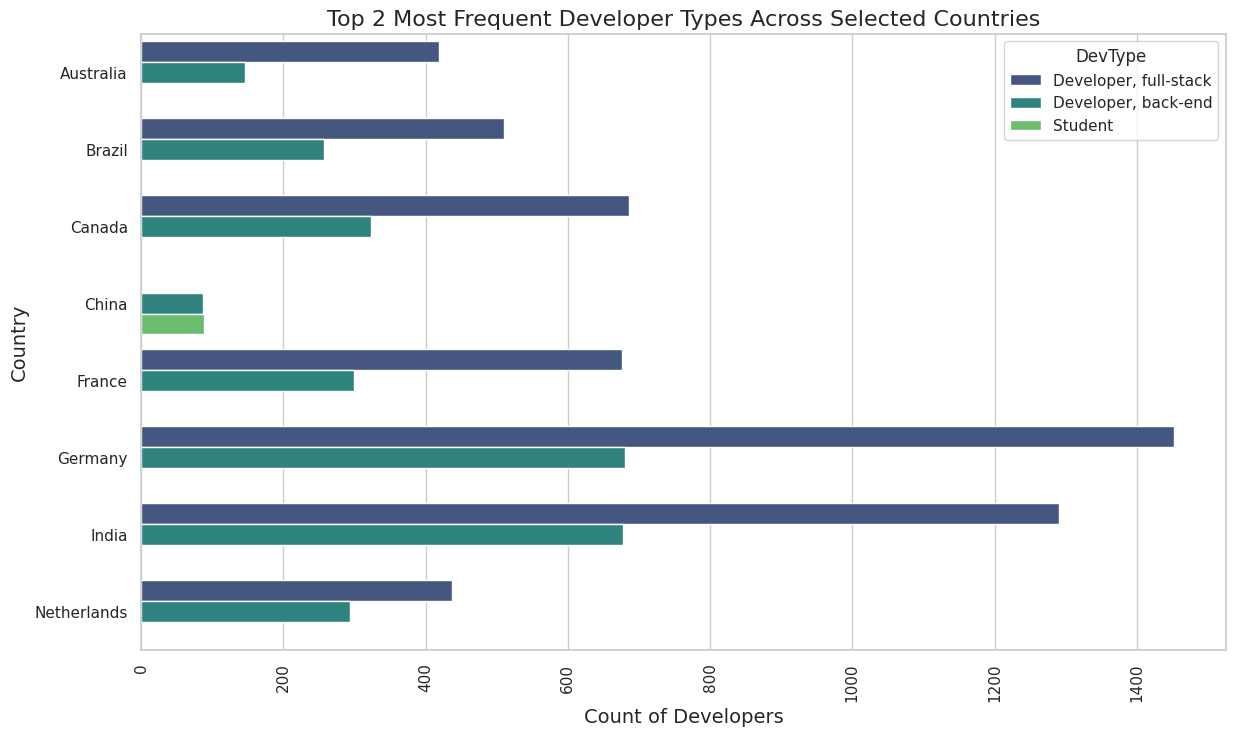

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data2024 is already loaded into your environment

# 1. Filter rows with non-null 'Country' and 'DevType'
filtered_data = data2024.dropna(subset=['Country', 'DevType'])

# 2. Filter data for the specified countries
selected_countries = ['USA', 'India', 'Germany', 'UK', 'Canada', 'France', 'Brazil', 'Australia', 'Netherlands', 'Russia', 'China']
filtered_data = filtered_data[filtered_data['Country'].isin(selected_countries)]

# 3. Group by Country and Developer Type (DevType), and get the count
country_devtype_count = filtered_data.groupby(['Country', 'DevType']).size().reset_index(name='Count')

# 4. For each country, find the top 2 most frequent developer types
top_devtypes = country_devtype_count.sort_values(['Country', 'Count'], ascending=[True, False])
top_2_devtypes = top_devtypes.groupby('Country').head(2)  # Get the top 2 most frequent for each country

# 5. Visualize the data
plt.figure(figsize=(14, 8))

# Use a seaborn barplot to show the top two developer types per country
sns.barplot(x='Count', y='Country', hue='DevType', data=top_2_devtypes, palette='viridis')

# Add title and labels
plt.title('Top 2 Most Frequent Developer Types Across Selected Countries', fontsize=16)
plt.xlabel('Count of Developers', fontsize=14)
plt.ylabel('Country', fontsize=14)

# Rotate the country labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()


##Clustering based on Salary, JobSatisfaction, Profession and Years of coding experience

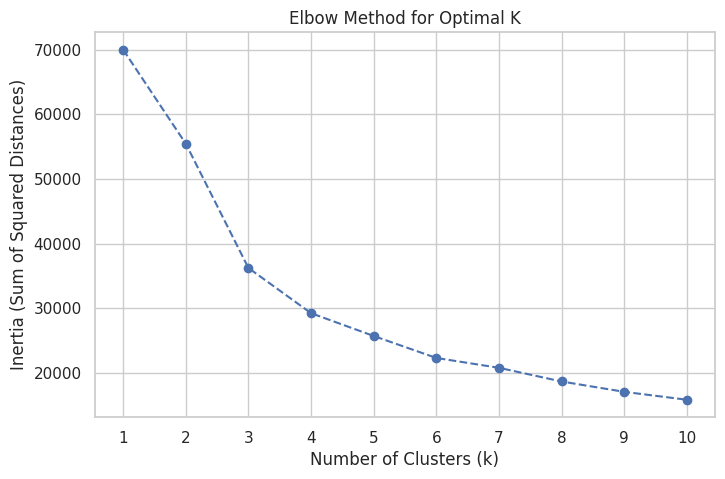

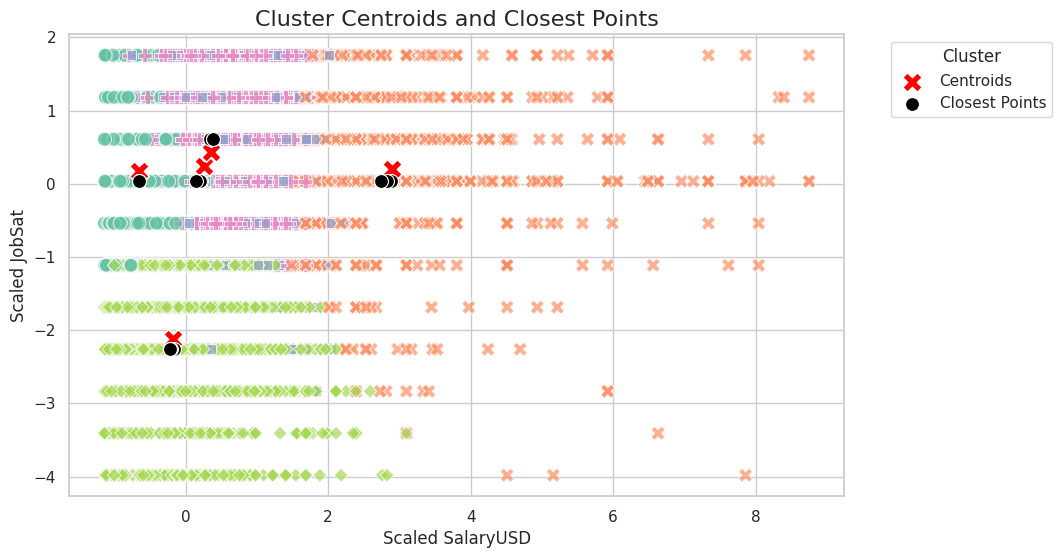

Cluster Summary:
             SalaryUSD    JobSat  YearsCode
Cluster                                    
0         34428.612189  7.239004   8.446741
1        285945.341902  7.281919  21.813196
2         98840.031092  7.375630  32.489916
3        105909.894753  7.710034  14.801013
4         67825.434898  3.231643  12.921650


In [49]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing
# Drop rows with missing SalaryUSD
data_clustering = data2024.dropna(subset=["SalaryUSD"]).copy()


# Remove rows where SalaryUSD is infinite or greater than 700k
data_clustering = data_clustering[~data_clustering["SalaryUSD"].isin([float('inf'), float('-inf')])]  # Remove infinities
data_clustering = data_clustering[data_clustering["SalaryUSD"] <= 700000]  # Remove salaries greater than 700k

# Fill missing JobSat with the median
data_clustering["JobSat"] = data_clustering["JobSat"].fillna(data_clustering["JobSat"].median())

# Convert 'YearsCode' to numeric values
data_clustering["YearsCode"] = data_clustering["YearsCode"].replace({
    'More than 50 years': 51
})
data_clustering["YearsCode"] = pd.to_numeric(data_clustering["YearsCode"], errors="coerce")

# Drop rows with null values after conversion
data_clustering = data_clustering.dropna(subset=["YearsCode"])


label_encoders = {}
for col in ["Profession", "Employment", "RemoteWork", "EdLevel"]: #label encode categorical features
    le = LabelEncoder()
    data_clustering[col] = le.fit_transform(data_clustering[col])
    label_encoders[col] = le

# Select relevant features for clustering
features = data_clustering[["SalaryUSD", "JobSat", "YearsCode"]]

# Normalize the numerical features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Elbow Method to find the optimal number of clusters
inertia = []
k_values = range(1, 11)  # Test k from 1 to 10
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Apply K-Means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=5)
data_clustering["Cluster"] = kmeans.fit_predict(features_scaled)
# Get the cluster centroids
centroids = kmeans.cluster_centers_

from sklearn.metrics.pairwise import euclidean_distances

# Calculate the Euclidean distances from each point to the centroids
distances = euclidean_distances(features_scaled, centroids)

# Find the indices of the 3 closest points to each centroid
closest_points_indices = []
for i in range(centroids.shape[0]):  # Loop through each centroid
    centroid_distances = distances[:, i]
    closest_indices = centroid_distances.argsort()[:3]  # Get the 3 closest points
    closest_points_indices.append(closest_indices)

# Flatten the list of closest points' indices
closest_points_indices = np.concatenate(closest_points_indices)

# Get the closest points
closest_points = features_scaled[closest_points_indices]

# Visualize the centroids and the 3 closest points to each centroid
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_scaled[:, 0], y=features_scaled[:, 1], hue=data_clustering["Cluster"], palette="Set2",
                style=data_clustering["Cluster"], s=100, alpha=0.7, legend=None)  # Plot all points
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='red', s=200, marker='X', label='Centroids')  # Plot centroids
sns.scatterplot(x=closest_points[:, 0], y=closest_points[:, 1], color='black', s=100, marker='o', label='Closest Points')  # Plot closest points

plt.title("Cluster Centroids and Closest Points", fontsize=16)
plt.xlabel("Scaled SalaryUSD", fontsize=12)
plt.ylabel("Scaled JobSat", fontsize=12)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Summarize the clusters
cluster_summary = data_clustering.groupby("Cluster")[["SalaryUSD", "JobSat", "YearsCode"]].mean()
print("Cluster Summary:")
print(cluster_summary)

#Gourab

##Predictive Analysis

#predictive analysis part 2

In [50]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    for idx, value  in col_series[col_series.notnull()].items():
        for option in value.split(';'):
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = 0.
            result_df.at[idx, option] = 1.
    return result_df[options]

def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

def age_process(val):
    if val == "45-54 years old" or val == "55-64 years old":
        return "Over 45"
    return val

def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

def YearCodeProProcess(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

def remote_work_process(val):
    if val == 'Hybrid (some remote, some in-person)':
        return "Hybrid"
    elif val == 'Fully remote':
        return "Remote"
    else:
        return "Person"

In [51]:
import pandas as pd

features_to_consider = ["RemoteWork", "EdLevel", "YearsCodePro", "DevType", "LanguageHaveWorkedWith", "PlatformHaveWorkedWith",
"ToolsTechHaveWorkedWith", "Country", "Age", "ConvertedCompYearly"]

def load_csv():
    data = pd.read_csv(r"/content/drive/MyDrive/survey_results_public.csv")
    data.drop(["ResponseId"], axis=1, inplace=True)
    return data

def select_feature():
    df = load_csv()

    df = df[df["MainBranch"] == "I am a developer by profession"]
    df = df[df["Employment"].isin(["Employed, full-time",
                "Independent contractor, freelancer, or self-employed",
                "Employed, full-time;Independent contractor, freelancer, or self-employed"])]

    df = df[features_to_consider]
    df = df.rename({
        "ConvertedCompYearly": "Salary"
    }, axis=1)

    df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)
    df = df[df["Salary"].notnull()]
    df = df.dropna()
    df = df.drop_duplicates()

    return df

def load_df():
    df = select_feature()

    # Age
    age_index_remove = df[df["Age"].isin(['Under 18 years old','65 years or older', 'Prefer not to say'])].index
    df.drop(age_index_remove, inplace=True)
    df["Age"] = df["Age"].apply(age_process)

    # EdLevel
    df["EdLevel"] = df["EdLevel"].apply(clean_education)

    # DevType
    dev_type = split_multicolumn(df["DevType"])
    dev_type_sum = dev_type.sum().sort_values(ascending=False)
    keep_col = dev_type_sum[dev_type_sum.values >= 900].index
    dev_type = dev_type[keep_col]
    df = pd.concat([df, dev_type], axis=1)
    df.drop(["DevType"], axis=1, inplace=True)

    # Country
    country_map = shorten_categories(df["Country"].value_counts(), 200)
    df["Country"] = df["Country"].map(country_map)

    # YearsCodePro
    df["YearsCodePro"] = df["YearsCodePro"].apply(YearCodeProProcess)

    # LanguageHaveWorkedWith
    language = split_multicolumn(df["LanguageHaveWorkedWith"])
    language_sum = language.sum().sort_values(ascending=False)
    keep_col = language_sum[language_sum.values >= 2000].index
    language = language[keep_col]
    df = pd.concat([df, language], axis=1)
    df.drop(["LanguageHaveWorkedWith"], axis=1, inplace=True)

    # PlatformHaveWorkedWith
    platform = split_multicolumn(df["PlatformHaveWorkedWith"])
    platform_sum = platform.sum().sort_values(ascending=False)
    keep_col = platform_sum[platform_sum.values >= 2000].index
    platform = platform[keep_col]
    df = pd.concat([df, platform], axis=1)
    df.drop(["PlatformHaveWorkedWith"], axis=1, inplace=True)

    # ToolTechHaveWorkedWith
    tool = split_multicolumn(df["ToolsTechHaveWorkedWith"])
    tool_sum = tool.sum().sort_values(ascending=False)
    keep_col = tool_sum[tool_sum.values >= 5000].index
    tool = tool[keep_col]
    df = pd.concat([df, tool], axis=1)
    df.drop(["ToolsTechHaveWorkedWith"], axis=1, inplace=True)

    # Salary
    df = df[df["Salary"] <= 0.3 * 1e6]

    return df

In [52]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, StandardScaler, MaxAbsScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_validate

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [53]:
scoring = ["neg_root_mean_squared_error",
            "neg_mean_absolute_error", "r2"]

In [54]:
df = load_df()
print(f"Dataframe shape: {df.shape}")
df.head(2)

Dataframe shape: (13956, 26)


,RemoteWork,EdLevel,YearsCodePro,Country,Age,Salary,"Developer, full-stack","Developer, back-end",JavaScript,SQL,...,PHP,Go,PowerShell,C++,Amazon Web Services (AWS),Microsoft Azure,Google Cloud,Cloudflare,Docker,npm
379,Remote,Master’s degree,6.0,Other,35-44 years old,91295.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
385,Remote,Master’s degree,17.0,France,35-44 years old,53703.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [55]:
print("*" * 25)
train = df.sample(frac=0.95, random_state=42)
test = df.drop(train.index)

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")
print("*" * 25)

X_train = train.drop(["Salary"], axis=1)
y_train = train["Salary"].values
X_test= test.drop(["Salary"], axis=1)
y_test = test["Salary"].values

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print("*" * 25)

*************************
Train shape: (13258, 26)
Test shape: (698, 26)
*************************
X_train shape: (13258, 25)
y_train shape: (13258,)
X_test shape: (698, 25)
y_test shape: (698,)
*************************


##Decision Tree

In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, cross_validate
import numpy as np

transform = ColumnTransformer([
    ("label", OrdinalEncoder(), ["EdLevel", "Country", "Age"]),
    ("onehot", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), ["RemoteWork"]),
    ("scaler", MaxAbsScaler(), ["YearsCodePro"])
], remainder="passthrough")

model = DecisionTreeRegressor(random_state=42)

pipe = Pipeline([
    ("preprocess", transform),
    ("model", model)
])

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'neg_root_mean_squared_error': 'neg_root_mean_squared_error',
    'neg_mean_absolute_error': 'neg_mean_absolute_error',
    'r2': 'r2'
}

scores = cross_validate(pipe, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=2)

print(f"RMSE: mean: {-1 * np.mean(scores['test_neg_root_mean_squared_error'])} | {-1 * scores['test_neg_root_mean_squared_error']}")
print(f"MAE: mean: {-1 * np.mean(scores['test_neg_mean_absolute_error'])} | {-1 * scores['test_neg_mean_absolute_error']}")
print(f"R2-score: mean: {np.mean(scores['test_r2'])} | {scores['test_r2']}")
print("*" * 69)
print()


RMSE: mean: 57636.13742245016 | [56126.38949629 56950.36093613 58531.34469645 58367.0178551
 58205.57412828]
MAE: mean: 41588.17724874588 | [40926.89328808 41753.67156863 41454.00301659 41955.08619389
 41851.23217654]
R2-score: mean: 0.07877392902340918 | [0.13647092 0.05429437 0.0712703  0.03798007 0.09385398]
*********************************************************************



#@ADABOOST

In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MaxAbsScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_validate
import numpy as np

transform = ColumnTransformer([
    ("label", OrdinalEncoder(), ["EdLevel", "Country", "Age"]),
    ("onehot", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), ["RemoteWork"]),
    ("scaler", MaxAbsScaler(), ["YearsCodePro"])
], remainder="passthrough")

model = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=200,
    random_state=42
)

pipe = Pipeline([
    ("preprocess", transform),
    ("model", model)
])

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'neg_root_mean_squared_error': 'neg_root_mean_squared_error',
    'neg_mean_absolute_error': 'neg_mean_absolute_error',
    'r2': 'r2'
}

scores = cross_validate(pipe, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=2)

print(f"RMSE: mean: {-1 * np.mean(scores['test_neg_root_mean_squared_error'])} | "
      f"{-1 * scores['test_neg_root_mean_squared_error']}")
print(f"MAE: mean: {-1 * np.mean(scores['test_neg_mean_absolute_error'])} | "
      f"{-1 * scores['test_neg_mean_absolute_error']}")
print(f"R2-score: mean: {np.mean(scores['test_r2'])} | {scores['test_r2']}")
print("*" * 69)
print()


RMSE: mean: 40292.803555656224 | [39188.8234847  39853.0331482  40848.28902745 40716.04008771
 40857.83203023]
MAE: mean: 29152.154757215827 | [29015.12009362 29349.82015281 28772.05883925 29134.93145519
 29488.84324521]
R2-score: mean: 0.5497849934125394 | [0.57901443 0.53688828 0.54766512 0.53185528 0.55350185]
*********************************************************************



In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MaxAbsScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_validate
import numpy as np

transform = ColumnTransformer([
    ("label", OrdinalEncoder(), ["EdLevel", "Country", "Age"]),
    ("onehot", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), ["RemoteWork"]),  # Updated sparse -> sparse_output
    ("scaler", MaxAbsScaler(), ["YearsCodePro"])
], remainder="passthrough")

model = RandomForestRegressor(n_estimators=200, n_jobs=2, random_state=42)

pipe = Pipeline([
    ("preprocess", transform),
    ("model", model)
])

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'neg_root_mean_squared_error': 'neg_root_mean_squared_error',
    'neg_mean_absolute_error': 'neg_mean_absolute_error',
    'r2': 'r2'
}

scores = cross_validate(pipe, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=2)

print(f"RMSE: mean: {-1 * np.mean(scores['test_neg_root_mean_squared_error'])} | "
      f"{-1 * scores['test_neg_root_mean_squared_error']}")
print(f"MAE: mean: {-1 * np.mean(scores['test_neg_mean_absolute_error'])} | "
      f"{-1 * scores['test_neg_mean_absolute_error']}")
print(f"R2-score: mean: {np.mean(scores['test_r2'])} | {scores['test_r2']}")
print("*" * 69)
print()


RMSE: mean: 40052.235734297035 | [39151.67292833 39567.25516228 40348.2469979  40388.74317898
 40805.26040399]
MAE: mean: 29061.741365731188 | [28823.51901277 29137.91748318 28729.67214195 29200.89554435
 29416.7026464 ]
R2-score: mean: 0.555198361133293 | [0.57981224 0.54350623 0.5586718  0.53935142 0.55465012]
*********************************************************************



In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MaxAbsScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_validate
import numpy as np

transform = ColumnTransformer([
    ("label", OrdinalEncoder(), ["EdLevel", "Country", "Age"]),
    ("onehot", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), ["RemoteWork"]),  # Fixed parameter
    ("scaler", MaxAbsScaler(), ["YearsCodePro"])
], remainder="passthrough")

model = GradientBoostingRegressor(n_estimators=200, random_state=42)

pipe = Pipeline([
    ("preprocess", transform),
    ("model", model)
])

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'neg_root_mean_squared_error': 'neg_root_mean_squared_error',
    'neg_mean_absolute_error': 'neg_mean_absolute_error',
    'r2': 'r2'
}

scores = cross_validate(pipe, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=2)


print(f"RMSE: mean: {-1 * np.mean(scores['test_neg_root_mean_squared_error'])} | "
      f"{-1 * scores['test_neg_root_mean_squared_error']}")
print(f"MAE: mean: {-1 * np.mean(scores['test_neg_mean_absolute_error'])} | "
      f"{-1 * scores['test_neg_mean_absolute_error']}")
print(f"R2-score: mean: {np.mean(scores['test_r2'])} | {scores['test_r2']}")
print("*" * 69)
print()


RMSE: mean: 38676.84515358686 | [37493.99546431 38128.42592071 39189.07282285 38723.29645369
 39849.43510637]
MAE: mean: 27693.468591296183 | [27236.36789233 27559.80896625 27563.59972633 27752.88485031
 28354.68152126]
R2-score: mean: 0.5852472725225971 | [0.61464039 0.57610259 0.58366559 0.57655822 0.57526958]
*********************************************************************



In [60]:
from sklearn.ensemble import VotingRegressor

# Instantiate individual models
decision_tree = Pipeline([("preprocess", transform), ("model", DecisionTreeRegressor(random_state=42))])
adaboost = Pipeline([("preprocess", transform), ("model", AdaBoostRegressor(DecisionTreeRegressor(), n_estimators=200, random_state=42))])
random_forest = Pipeline([("preprocess", transform), ("model", RandomForestRegressor(n_estimators=200, random_state=42))])
gradient_boosting = Pipeline([("preprocess", transform), ("model", GradientBoostingRegressor(n_estimators=200, random_state=42))])

# Combine using Voting Regressor
ensemble = VotingRegressor([
    ("adaboost", adaboost),
    ("random_forest", random_forest),
    ("gradient_boosting", gradient_boosting)
])

# Cross-validate the ensemble
ensemble_scores = cross_validate(ensemble, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=2)

print(f"Ensemble RMSE: mean: {-1 * np.mean(ensemble_scores['test_neg_root_mean_squared_error'])}")
print(f"Ensemble MAE: mean: {-1 * np.mean(ensemble_scores['test_neg_mean_absolute_error'])}")
print(f"Ensemble R2-score: mean: {np.mean(ensemble_scores['test_r2'])}")

Ensemble RMSE: mean: 39074.561515789785
Ensemble MAE: mean: 28118.162496464363
Ensemble R2-score: mean: 0.5766541837647265
